# NumPy With TA - Solution

You have learned NumPy. You know how to create, modify, and explore NumPy array.

Furthermore, you know 1-d 2-d 3-d array. But how does it look like in practice?

Download this image to your computer. [img](./figures/cat.jpg)

Once you download the image, we can import the image into Python using `PIL` library [link](https://pillow.readthedocs.io/en/stable/reference/Image.html)

Therefore, `pip install Pillow`

In [113]:
!pip install Pillow


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [114]:
from PIL import Image
import numpy as np

img = Image.open('../figures/cat.jpg')
print(type(img))
print(img)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F3AD86E57C0>


To view the image, we use `.show()`

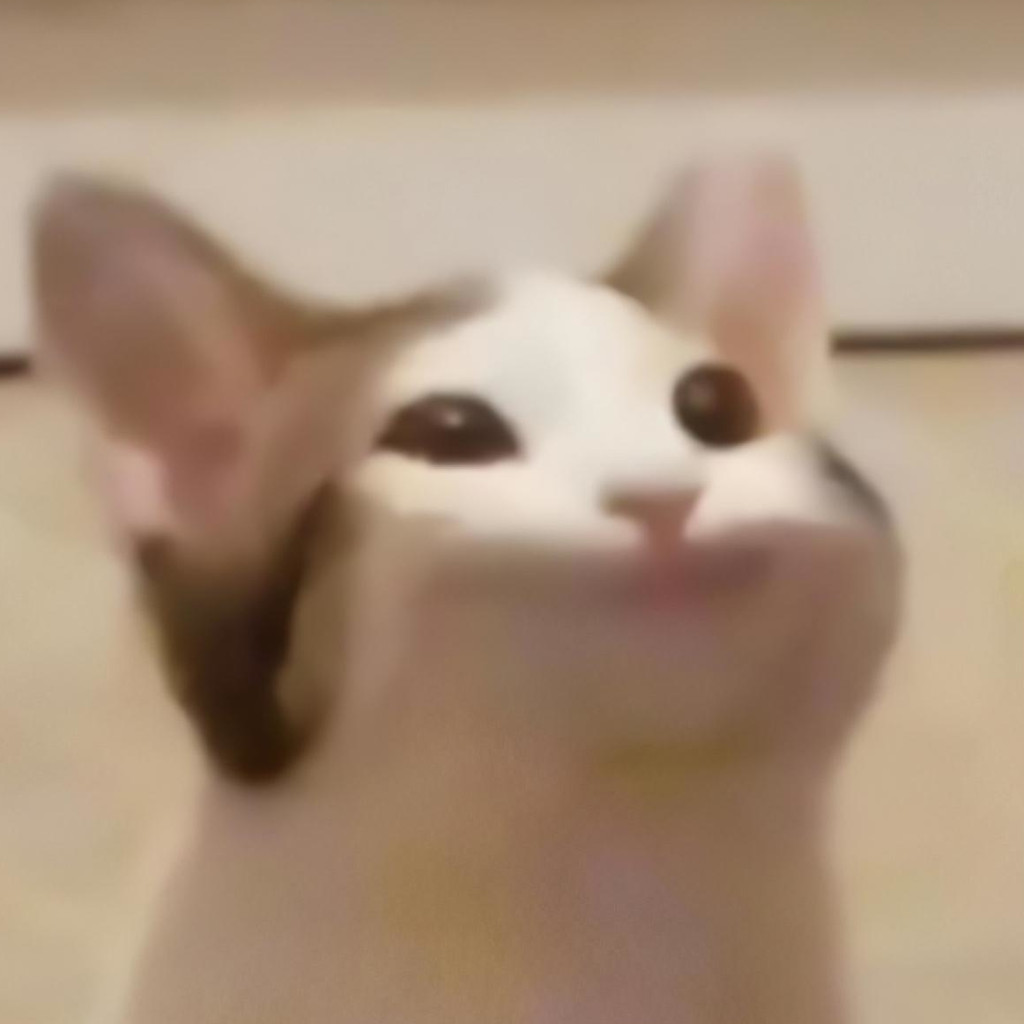

In [115]:
img.show()

Yay, we got the image of Pop Cat.

But... How is this related to NumPy again?

We can convert the `PIL image` to `NumPy` array.

In [116]:
img_array = np.array(img)
img_array.shape

(1024, 1024, 3)

Suddenly, we get 3d-array.

But.. Should not the image be 2D? Why 3D?

Ahhh young padawan, we learned many years ago that any color is form from different level of 3 primary colors. In fact, your computer monitor consists of small pixels. Each pixel consists of 3 color LEDs. Thus, when you want to represent an image, you have to collect for each pixel/cell 3 values which is the amount of Red-Blue-Green.

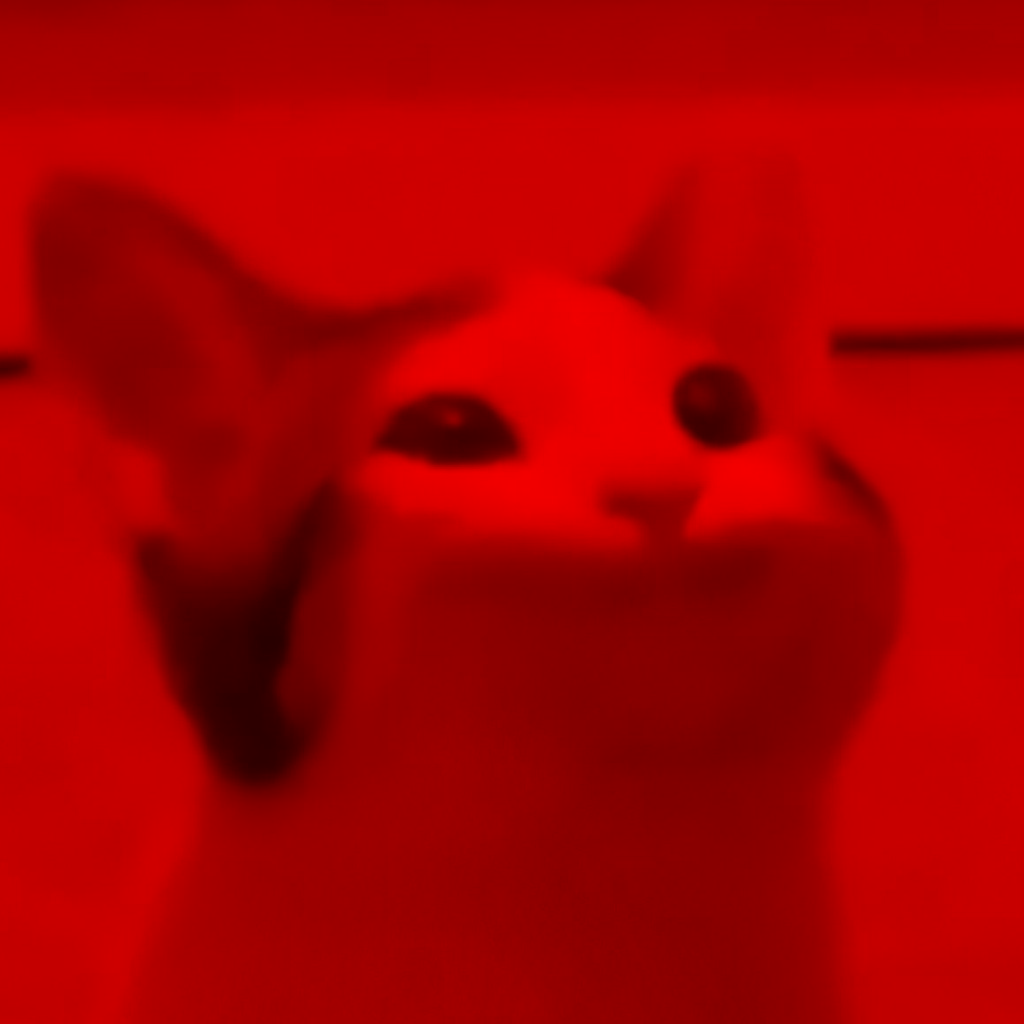

In [117]:
img_array_only_red = img_array.copy()
img_array_only_red[:,:,1] = 0
img_array_only_red[:,:,2] = 0
Image.fromarray(img_array_only_red).show()

RGB is the most format of picture. Sure, there are more formats and each format may require different extension name. Just so you know.

![img](https://process.filestackapi.com/cache=expiry:max/pAVCjc9LSYSFYnkM4HtK)

## Task 1

I want you to crop the image so that we only see the eye of the cat.

*Hint: use slicing*

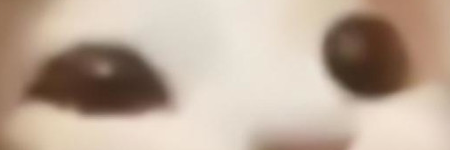

In [118]:
Image.fromarray(img_array[350:500,350:800,:])

## Task 2

Now that you find the indices contain cat eyes, draw a red solid box on the image on the entire section.

*Hint: slicing and modifying*
*Hint: Range of valid value is 8-bits (0-255) where 255 is the strongest intensity*

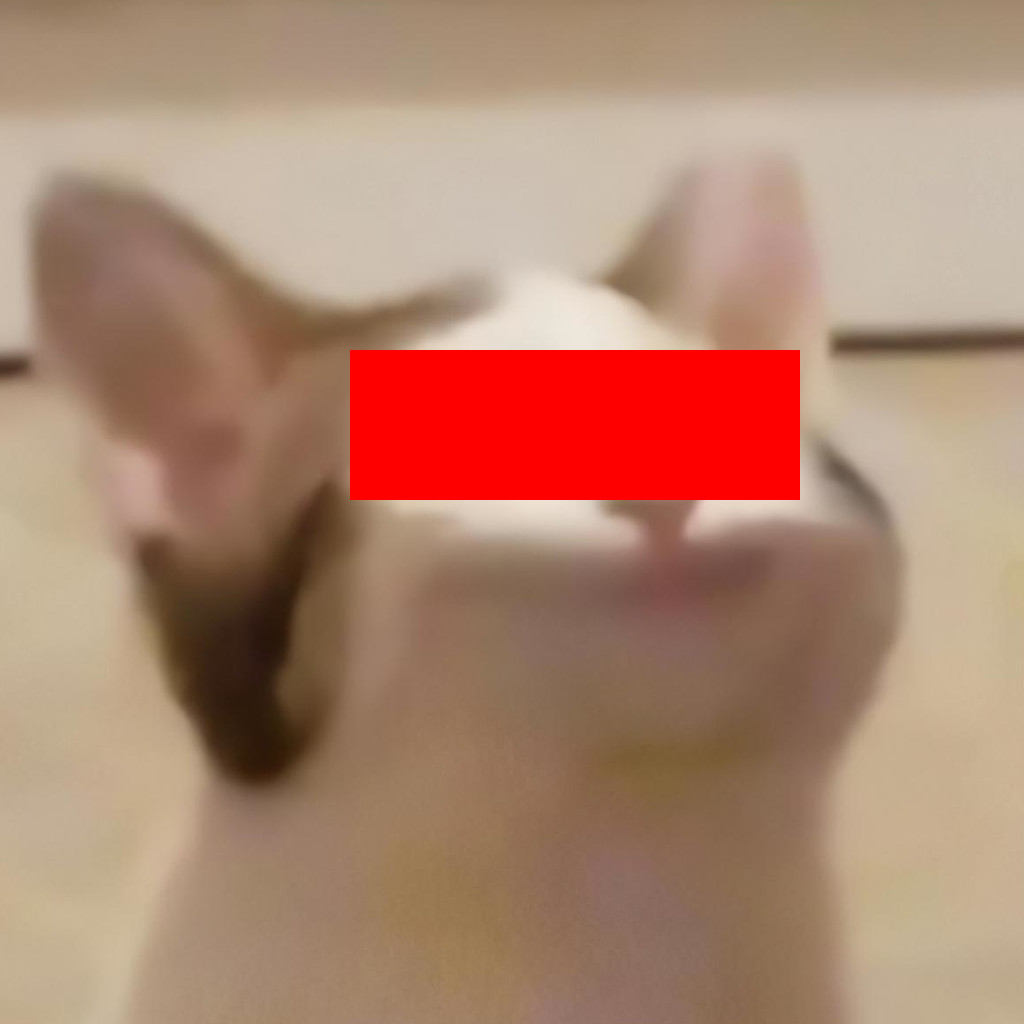

In [119]:
img_array_red_box = img_array.copy()
img_array_red_box[350:500,350:800,0] = 255
img_array_red_box[350:500,350:800,1:3] = 0
Image.fromarray(img_array_red_box).show()

## Task 3

This should be easy now. Draw a white solid box.

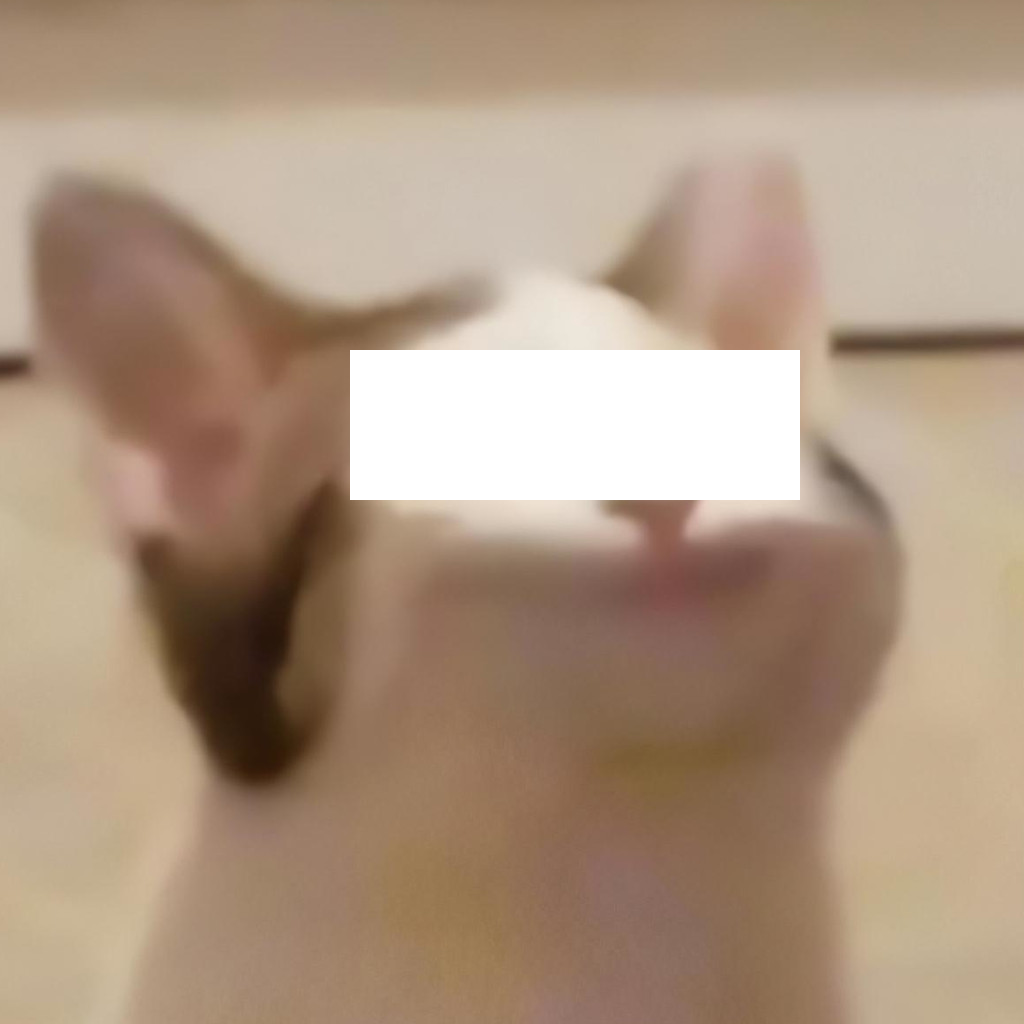

In [120]:
img_array_white_box = img_array.copy()
img_array_white_box[350:500,350:800,0:3] = 255
Image.fromarray(img_array_white_box).show()

## Task 4

This will be challenging.

Draw a black frame over the eye area.

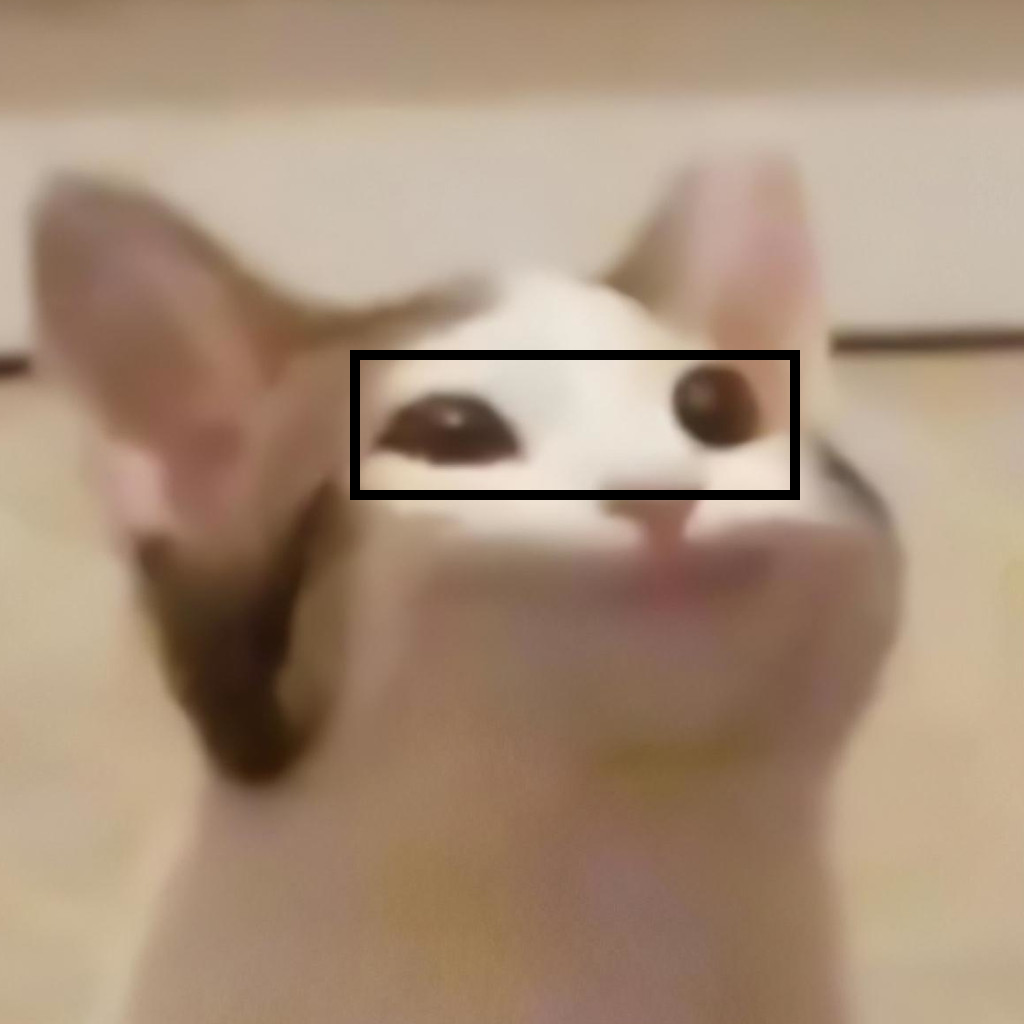

In [121]:
img_with_black_frame = img_array.copy()
eye_area = img_with_black_frame[350:500,350:800,:]
frame = np.zeros(eye_area.shape)
frame[10:-10,10:-10,:] = 1
eye_area = eye_area * frame
img_with_black_frame[350:500,350:800,:] = eye_area
Image.fromarray(img_with_black_frame).show()

## Task 5

Now, stack the images into 4d NumPy array.

The shape should be `(4,1024,1024,3)`

*Hint: expand_dims of each image to (1,1024,1024,3). Then use `np.concatenate` or `np.vstack`. Wow, this is basically the answer. Lol.*

In [122]:
all_img = np.vstack([np.expand_dims(img_array, axis=0),
                     np.expand_dims(img_array_red_box, axis=0), 
                     np.expand_dims(img_array_white_box, axis=0), 
                     np.expand_dims(img_with_black_frame, axis=0)]
                     )
all_img.shape

(4, 1024, 1024, 3)

## Task 6

Rotate the image counter-clockwise 90 degree.

*Hint: Row becomes column. Column becomes row. Use `.swapaxes`*

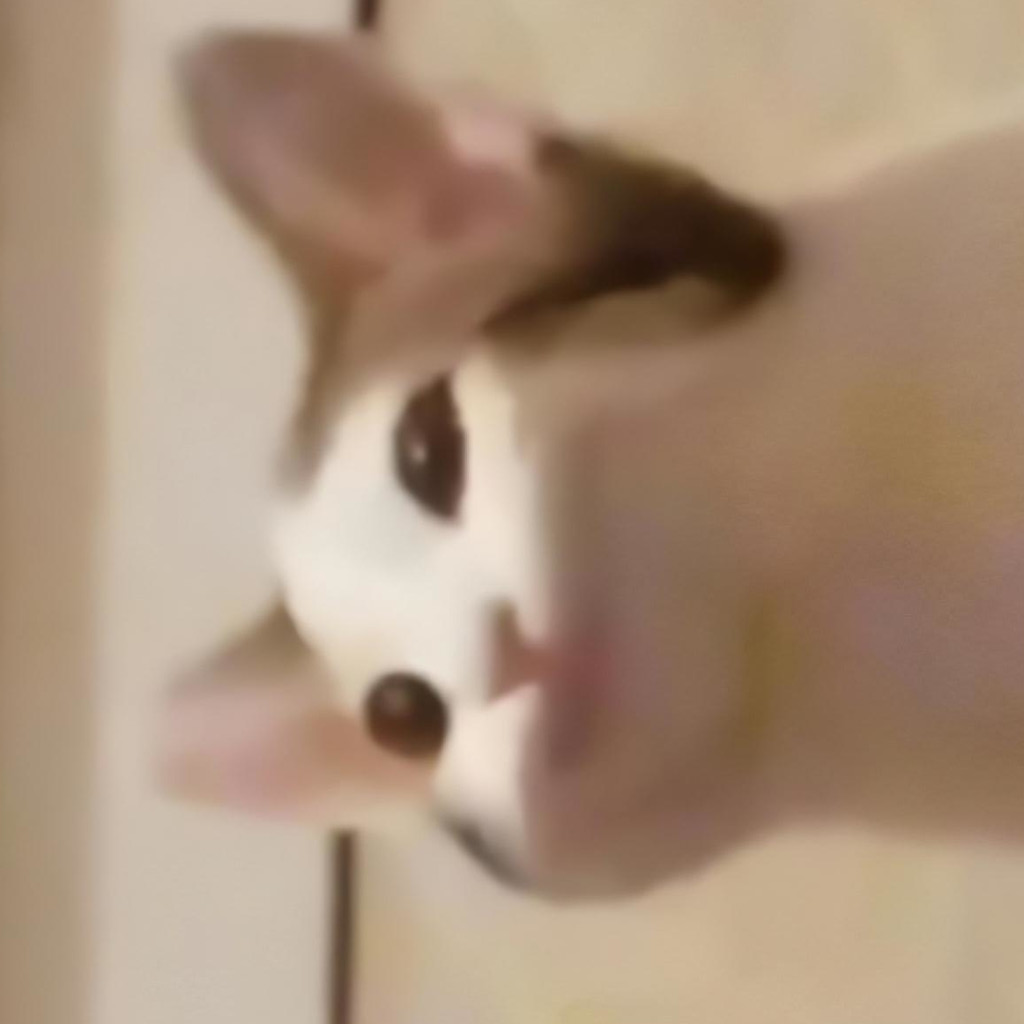

In [123]:
img_array_90 = img_array.swapaxes(0,1)
Image.fromarray(img_array_90).show()

## Task 7

Rotate the image 180 degree

*Hint: use `np.flip()`*

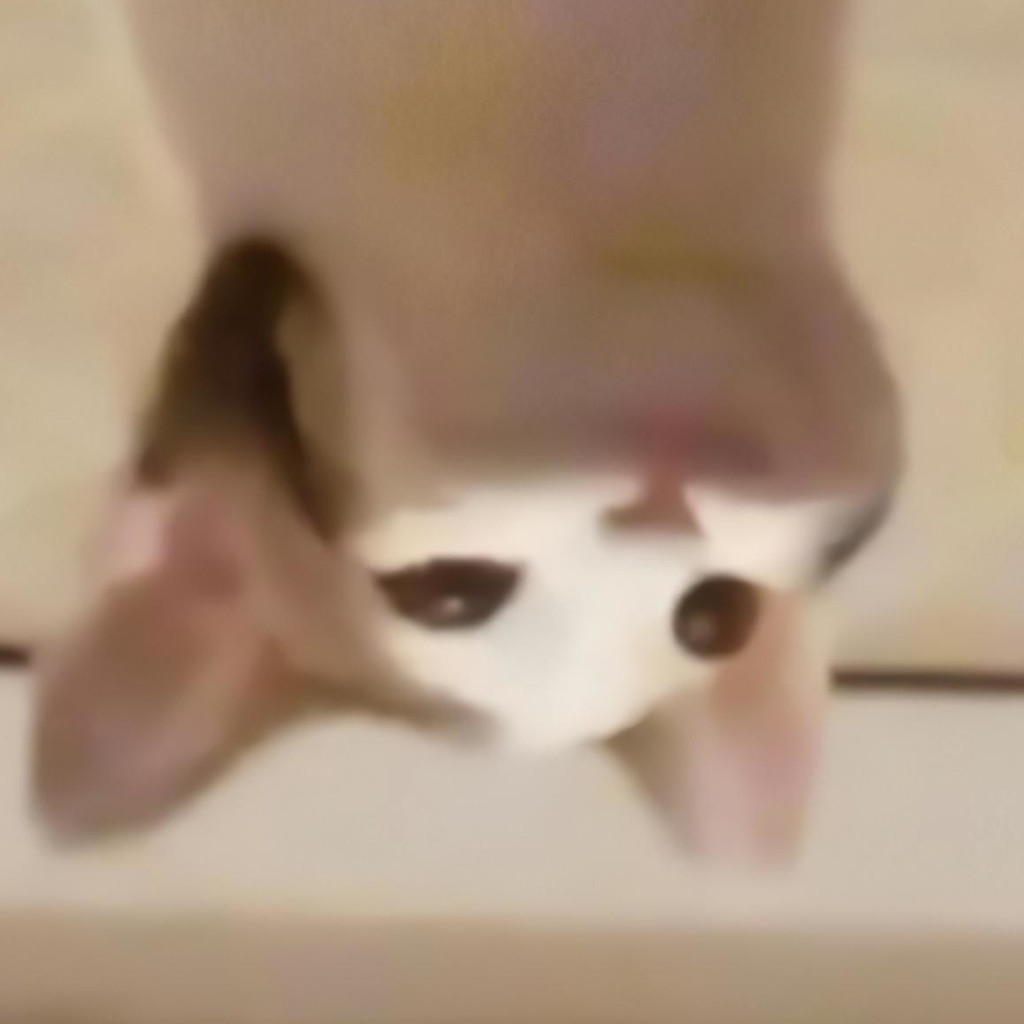

In [124]:
img_array_180 = np.flip(img_array,axis=0)
Image.fromarray(img_array_180).show()

## Task 8

I think you can guess by now. Rotate the image 270 degree counter-clockwise or 90 degree clockwise.

*Hint: use both `swapaxes` and `flip`*


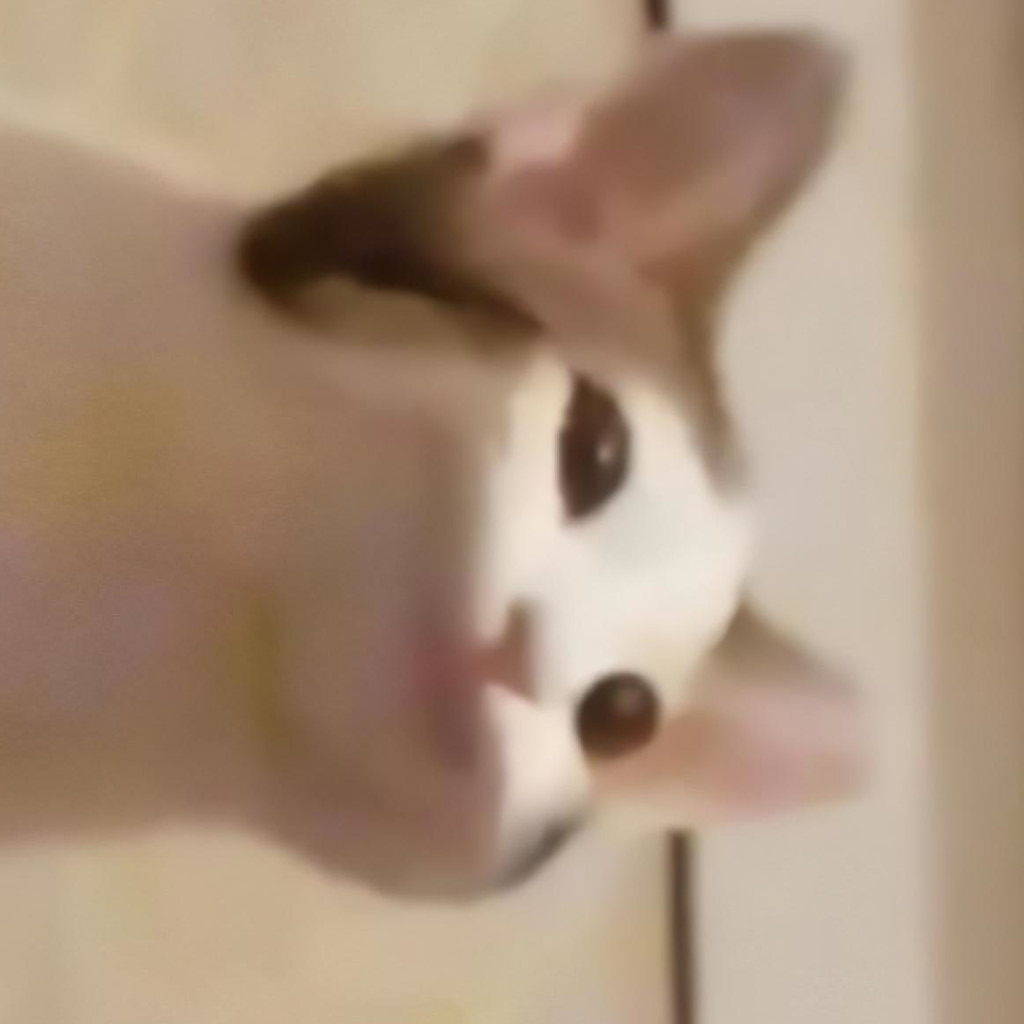

In [125]:
img_array_270 = np.flip(img_array.swapaxes(0,1), axis=1)
Image.fromarray(img_array_270).show()

## Task 9

Create a GIF image.

To do so.

1. Create images list
2. Append each `PIL Image` into the list
3. Save the image use this code 
```
images[0].save('./cat.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)
```

In [127]:
images = []
images.append(Image.fromarray(img_array))
images.append(Image.fromarray(img_array_90))
images.append(Image.fromarray(img_array_180))
images.append(Image.fromarray(img_array_270))

images[0].save('../figures/cat.gif',save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)